In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_year_data(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = year

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    
    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures['yield'] = yield_by_culture#)#, on='index')
    return df_cultures

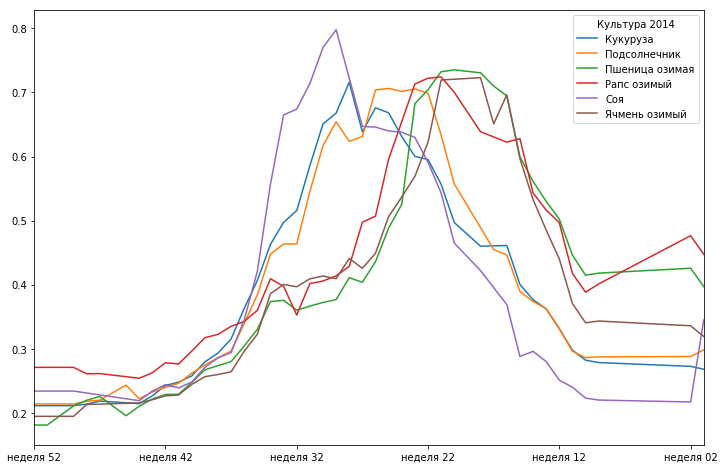

In [3]:
dfc14 = get_year_data('2014')
dfc14.drop('yield', axis=1, inplace=True)
dfc14.T.plot(figsize=(12,8))


In [10]:
from sklearn import svm
from sklearn import metrics
dfc14 = get_year_data('2014')
y = dfc14['yield']
X = dfc14.drop('yield', axis=1).as_matrix()

dfc15 = get_year_data('2015')
y_train = dfc15['yield']
X_train = dfc15.drop('yield', axis=1).as_matrix()

model = svm.SVR()
model.fit(X, y)
pred = model.predict(dfc15.drop('yield', axis=1).as_matrix())
model.score(X, y)#accuracy_score(y_train.as_matrix(), pred)
# y_train.as_matrix()

0.039738549701771708